You are given a 0-indexed 2D matrix grid of size n x n, where (r, c) represents:

    A cell containing a thief if grid[r][c] = 1
    An empty cell if grid[r][c] = 0

You are initially positioned at cell (0, 0). In one move, you can move to any adjacent cell in the grid, including cells containing thieves.

The safeness factor of a path on the grid is defined as the minimum manhattan distance from any cell in the path to any thief in the grid.

Return the maximum safeness factor of all paths leading to cell (n - 1, n - 1).

An adjacent cell of cell (r, c), is one of the cells (r, c + 1), (r, c - 1), (r + 1, c) and (r - 1, c) if it exists.

The Manhattan distance between two cells (a, b) and (x, y) is equal to |a - x| + |b - y|, where |val| denotes the absolute value of val.

 

Example 1:

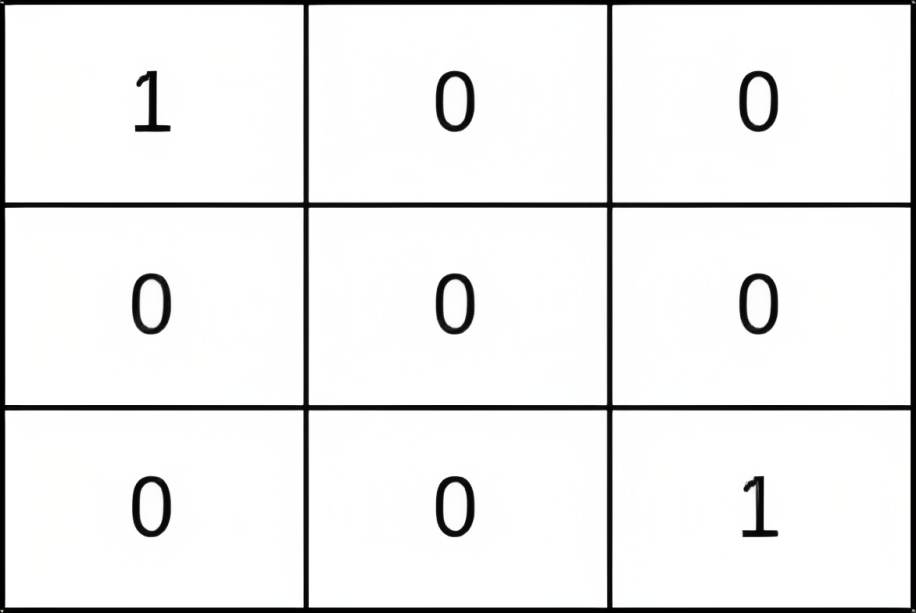

Input: grid = [[1,0,0],[0,0,0],[0,0,1]]
Output: 0
Explanation: All paths from (0, 0) to (n - 1, n - 1) go through the thieves in cells (0, 0) and (n - 1, n - 1).

Example 2:

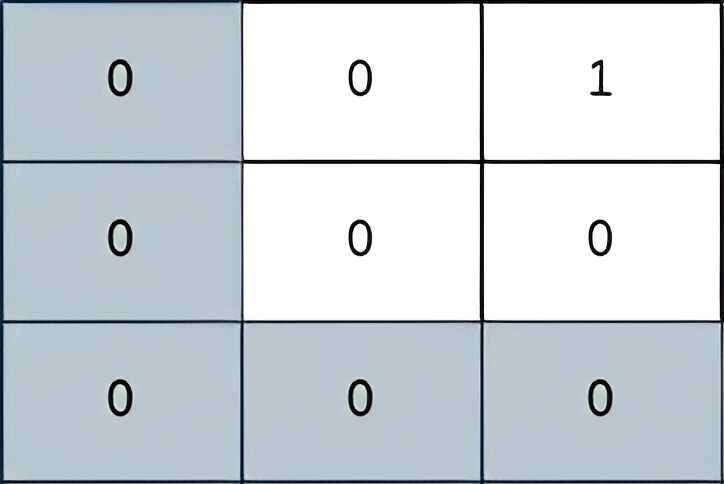

Input: grid = [[0,0,1],[0,0,0],[0,0,0]]
Output: 2
Explanation: The path depicted in the picture above has a safeness factor of 2 since:
- The closest cell of the path to the thief at cell (0, 2) is cell (0, 0). The distance between them is | 0 - 0 | + | 0 - 2 | = 2.
It can be shown that there are no other paths with a higher safeness factor.

Example 3:

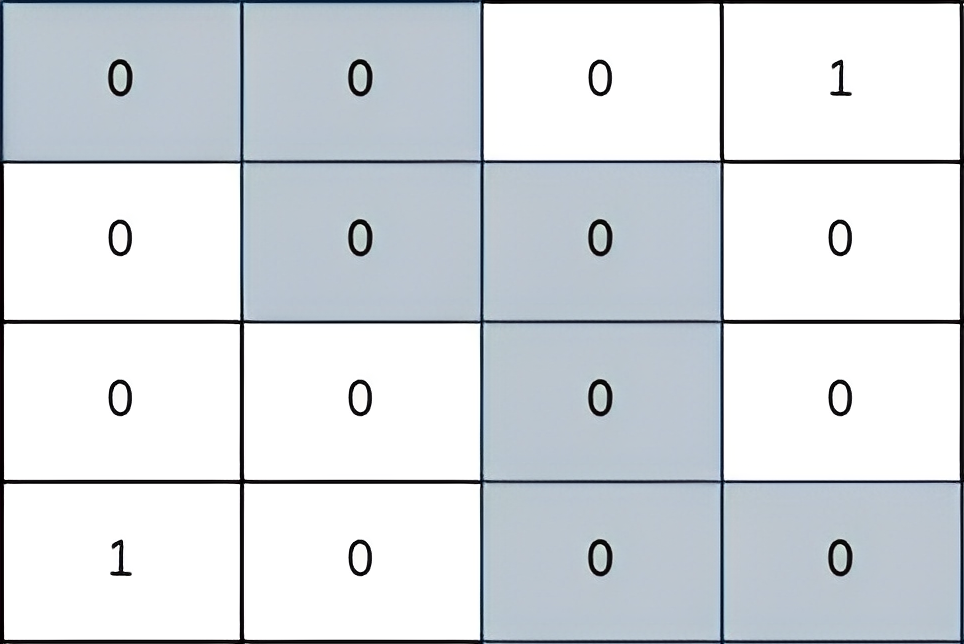

Input: grid = [[0,0,0,1],[0,0,0,0],[0,0,0,0],[1,0,0,0]]
Output: 2
Explanation: The path depicted in the picture above has a safeness factor of 2 since:
- The closest cell of the path to the thief at cell (0, 3) is cell (1, 2). The distance between them is | 0 - 1 | + | 3 - 2 | = 2.
- The closest cell of the path to the thief at cell (3, 0) is cell (3, 2). The distance between them is | 3 - 3 | + | 0 - 2 | = 2.
It can be shown that there are no other paths with a higher safeness factor.

 

Constraints:

    1 <= grid.length == n <= 400
    grid[i].length == n
    grid[i][j] is either 0 or 1.
    There is at least one thief in the grid.



In [ ]:
class Solution:
    # Directions for moving to neighboring cells: right, left, down, up
    dir = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    def maximumSafenessFactor(self, grid: List[List[int]]) -> int:
        n = len(grid)

        multi_source_queue = deque()
        # Mark thieves as 0 and empty cells as -1, and push thieves to the queue
        for i in range(n):
            for j in range(n):
                if grid[i][j] == 1:
                    # Push thief coordinates to the queue
                    multi_source_queue.append((i, j))
                    # Mark thief cell with 0
                    grid[i][j] = 0
                else:
                    # Mark empty cell with -1
                    grid[i][j] = -1

        # Calculate safeness factor for each cell using BFS
        while multi_source_queue:
            size = len(multi_source_queue)
            while size > 0:
                curr = multi_source_queue.popleft()
                # Check neighboring cells
                for d in self.dir:
                    di, dj = curr[0] + d[0], curr[1] + d[1]
                    val = grid[curr[0]][curr[1]]
                    # Check if the cell is valid and unvisited
                    if self.isValidCell(grid, di, dj) and grid[di][dj] == -1:
                        # Update safeness factor and push to the queue
                        grid[di][dj] = val + 1
                        multi_source_queue.append((di, dj))
                size -= 1

        # Binary search for maximum safeness factor
        start, end, res = 0, 0, -1
        for i in range(n):
            for j in range(n):
                # Set end as the maximum safeness factor possible
                end = max(end, grid[i][j])

        while start <= end:
            mid = start + (end - start) // 2
            if self.isValidSafeness(grid, mid):
                # Store valid safeness and search for larger ones
                res = mid
                start = mid + 1
            else:
                end = mid - 1

        return res
    
    # Check if a given cell lies within the grid
    def isValidCell(self, grid, i, j) -> bool:
        n = len(grid)
        return 0 <= i < n and 0 <= j < n

    # Check if a path exists with given minimum safeness value
    def isValidSafeness(self, grid, min_safeness) -> bool:
        n = len(grid)

        # Check if the source and destination cells satisfy minimum safeness
        if grid[0][0] < min_safeness or grid[n - 1][n - 1] < min_safeness:
            return False

        traversal_queue = deque([(0, 0)])
        visited = [[False] * n for _ in range(n)]
        visited[0][0] = True

        # Breadth-first search to find a valid path
        while traversal_queue:
            curr = traversal_queue.popleft()
            if curr[0] == n - 1 and curr[1] == n - 1:
                return True  # Valid path found

            # Check neighboring cells
            for d in self.dir:
                di, dj = curr[0] + d[0], curr[1] + d[1]
                # Check if the neighboring cell is valid and unvisited
                if self.isValidCell(grid, di, dj) and not visited[di][dj] and grid[di][dj] >= min_safeness:
                    visited[di][dj] = True
                    traversal_queue.append((di, dj))

        return False  # No valid path found